In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = "../../data"
od_dir = os.path.join(data_dir, "OD_PT")
#os.listdir(od_dir)

In [3]:

months = ["202001"] #"201911", "201912"
for m in months:
    df_merge = None
    for hr in range(5,24):
        print(hr)
        f = "OD_{}_weekday_{}.csv.xz".format(m, str(hr).zfill(2))
        fp = os.path.join(od_dir, f)
        print(fp)
        df_flow = pd.read_csv(fp, index_col=0)
        df_flow = df_flow[["origin", "destination", "total_flow"]]
        df_flow = df_flow.rename(columns={"total_flow": "hour_{}".format(str(hr).zfill(2))})
        #print(df_flow.head())

        if df_merge is None:
            df_merge = df_flow
        else:
            df_merge = pd.merge(df_merge, df_flow, left_on=["origin", "destination"], right_on=["origin", "destination"], 
                               how="outer", suffixes=('_o', '_n'), validate="one_to_one")
        #break
    colval = { col:0 for col in df_merge.columns if col not in ["origin", "destination"]}
    df_merge = df_merge.fillna(value=colval)
    print(df_merge.head())
    df_merge.to_csv(os.path.join(data_dir, "OD_{}_weekday.csv.xz".format(m)), index_label="ind", compression="xz")

5
../../data/OD_PT/OD_202001_weekday_05.csv.xz
6
../../data/OD_PT/OD_202001_weekday_06.csv.xz
7
../../data/OD_PT/OD_202001_weekday_07.csv.xz
8
../../data/OD_PT/OD_202001_weekday_08.csv.xz
9
../../data/OD_PT/OD_202001_weekday_09.csv.xz
10
../../data/OD_PT/OD_202001_weekday_10.csv.xz
11
../../data/OD_PT/OD_202001_weekday_11.csv.xz
12
../../data/OD_PT/OD_202001_weekday_12.csv.xz
13
../../data/OD_PT/OD_202001_weekday_13.csv.xz
14
../../data/OD_PT/OD_202001_weekday_14.csv.xz
15
../../data/OD_PT/OD_202001_weekday_15.csv.xz
16
../../data/OD_PT/OD_202001_weekday_16.csv.xz
17
../../data/OD_PT/OD_202001_weekday_17.csv.xz
18
../../data/OD_PT/OD_202001_weekday_18.csv.xz
19
../../data/OD_PT/OD_202001_weekday_19.csv.xz
20
../../data/OD_PT/OD_202001_weekday_20.csv.xz
21
../../data/OD_PT/OD_202001_weekday_21.csv.xz
22
../../data/OD_PT/OD_202001_weekday_22.csv.xz
23
../../data/OD_PT/OD_202001_weekday_23.csv.xz
          origin     destination       hour_05       hour_06        hour_07  \
0  TAMPINES EA

In [4]:

months = ["202001"] #"201911", "201912"
for m in months:
    df_merge = None
    for hr in range(5,24):
        print(hr)
        f = "OD_{}_weekend_{}.csv.xz".format(m, str(hr).zfill(2))
        fp = os.path.join(od_dir, f)
        df_flow = pd.read_csv(fp, index_col=0)
        df_flow = df_flow[["origin", "destination", "total_flow"]]
        df_flow = df_flow.rename(columns={"total_flow": "hour_{}".format(str(hr).zfill(2))})
        #print(df_flow.head())

        if df_merge is None:
            df_merge = df_flow
        else:
            df_merge = pd.merge(df_merge, df_flow, left_on=["origin", "destination"], right_on=["origin", "destination"], 
                               how="outer", suffixes=('_o', '_n'))#, validate="one_to_one")
        #break
    colval = { col:0 for col in df_merge.columns if col not in ["origin", "destination"]}
    df_merge = df_merge.fillna(value=colval)
    print(df_merge.head())
    df_merge.to_csv(os.path.join(data_dir, "OD_{}_weekend.csv.xz".format(m)), index_label="ind", compression="xz")

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
                 origin    destination      hour_05      hour_06  \
0         TAMPINES EAST  TAMPINES EAST  2531.908293  8363.479005   
1              BRADDELL     TOWNSVILLE    18.051257    28.079733   
2  DEFU INDUSTRIAL PARK   GEYLANG EAST    13.037019    50.142380   
3             TRAFALGAR      TRAFALGAR   192.647025   677.323273   
4          GEYLANG EAST   PEARL'S HILL     7.019933    18.051257   

        hour_07       hour_08       hour_09       hour_10       hour_11  \
0  14667.376701  21834.373083  27129.155497  30616.316247  32638.843941   
1     23.065495     45.128142     63.179399     61.173704     68.193637   
2    145.412903    211.600845    221.629321    211.600845    269.766006   
3    946.788425   1522.723805   1989.148227   2201.651635   2257.109108   
4     15.042714     28.079733     53.150923     41.116752     51.145228   

        hour_12  ...       hour_14       hour_15       hour_16       hour_17  \
0  33679

In [15]:
cormat = df_merge.corr(method ='pearson').as_matrix()

/home/benny/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


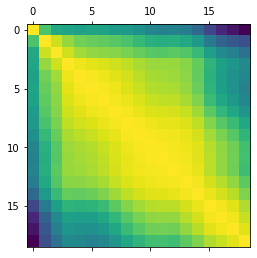

In [17]:
plt.matshow(cormat)

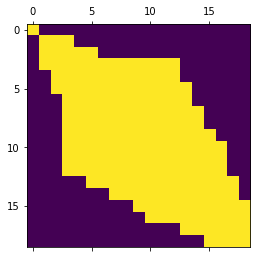

In [25]:
plt.matshow(np.where(cormat>=0.92, 1, 0))